In [1]:
import pandas as pd
import numpy as np

from IPython.display import display
#from IPython.html import widgets
import ipywidgets as widgets

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import train_test_split, cross_val_score, KFold, StratifiedKFold, LabelKFold, LeaveOneOut
from sklearn.utils import resample

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


%matplotlib inline

## Motivation

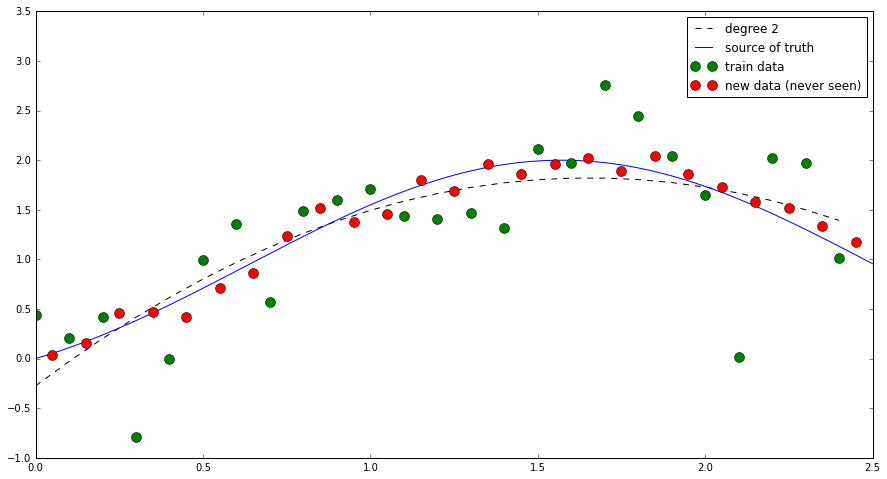

In [2]:
def plot_fit(degree):
    np.random.seed(20)
    
    f = lambda x: np.sin(x)**2 + np.sin(x)
    x = np.linspace(0., 2.5, 200)
    y = f(x)

    x_train = np.arange(0., 2.5, 0.1)
    y_train = f(x_train) + np.random.randn(len(x_train)) / 2.

    x_new = np.arange(0.05, 2.5, 0.1)
    y_new = f(x_new) + np.random.randn(len(x_new)) / 10.

    plt.figure(figsize=(15,8))

    model = LinearRegression()


    model.fit(np.vander(x_train, degree + 1), y_train);
    y_lrp = model.predict(np.vander(x_train, degree + 1))
    plt.plot(x_train, y_lrp,'--k', label='degree ' + str(degree))

    plt.plot(x, y, label="source of truth")
    plt.plot(x_train, y_train, 'o', ms=10, label='train data')
    plt.plot(x_new, y_new, 'o', c='r', ms=10, label='new data (never seen)')

    plt.ylim([-1, 3.5])
    plt.legend()
    plt.show()
    
    
degree = widgets.IntSlider(min=1, max=30, value=2)

w = widgets.interactive(plot_fit,degree=degree)
display(w)

## Validation

### Hold out Validation

In [3]:
nrows = 100

X = np.random.randint(0, 20, (nrows, 5))
y = np.arange(nrows)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

((70, 5), (30, 5))
((70,), (30,))


## Bootstraping

In [4]:
X = np.random.randint(0, 10, (5, 5))

print(X)

print('\nBoostraping:')
for i in range(5):
    print("\niteration: {0}".format(i))
    print(resample(X, replace=True, n_samples=3))

[[4 3 8 3 8]
 [1 5 0 1 0]
 [9 1 6 7 7]
 [1 1 4 1 0]
 [5 8 6 1 1]]

Boostraping:

iteration: 0
[[1 5 0 1 0]
 [1 1 4 1 0]
 [4 3 8 3 8]]

iteration: 1
[[5 8 6 1 1]
 [1 1 4 1 0]
 [5 8 6 1 1]]

iteration: 2
[[1 5 0 1 0]
 [1 5 0 1 0]
 [9 1 6 7 7]]

iteration: 3
[[5 8 6 1 1]
 [1 1 4 1 0]
 [1 5 0 1 0]]

iteration: 4
[[5 8 6 1 1]
 [1 1 4 1 0]
 [9 1 6 7 7]]


### Cross-Validation: k-fold

In [5]:
kf = KFold(10, n_folds=5)
for train, test in kf:
    print("%s %s" % (train, test))

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


### Cross-Validation: Leave-One-Out

In [6]:
loo = LeaveOneOut(4)
for train, test in loo:
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


### Cross-Validation: Stratified k-fold

In [7]:
labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(labels, 3)
for train, test in skf:
    print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


In [8]:
def plot_kfold(skf, labels):
    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4878CF', '#6ACC65', '#D65F5F', '#B47CC7', '#C4AD66', '#77BEDB'] 
    max_y = 160
    
    def add_box(ax, rect_hos_pos, rect_vert_pos, color_box, label_box):
        rect = Rectangle((rect_hos_pos, rect_vert_pos), 10, 20, color=color_box)
        ax.text(rect_hos_pos + 3, rect_vert_pos + 5, label_box, fontsize=15, color="#ffffff")
        ax.add_patch(rect)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(10):
        add_box(ax, i*10 + 2*i + 5, max_y - 20, colors[i], labels[i])


    for lvl, (train, test) in enumerate(skf):
        vert_pos = max_y - 60 - 30*lvl

        for i in range(len(train)):
            hos_pos = i*10 + 2*i
            add_box(ax, hos_pos, vert_pos, colors[train[i]], labels[train[i]])

        for i in range(len(test)):        
            offset = len(train) * 10 + 2*len(train) + 10
            hos_pos = i*10 + 2*i + offset
            add_box(ax, hos_pos, vert_pos, colors[test[i]], labels[test[i]])


    plt.xlim([0, 135])
    plt.ylim([0, 160])
    plt.axis('off')
    plt.show()

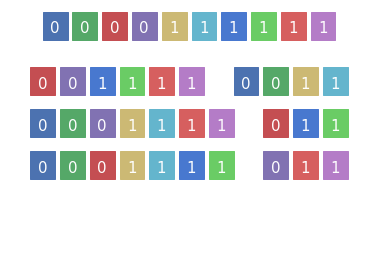

In [9]:
skf = StratifiedKFold(labels, 3) #check for 2 or 4
labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] 

plot_kfold(skf, labels)

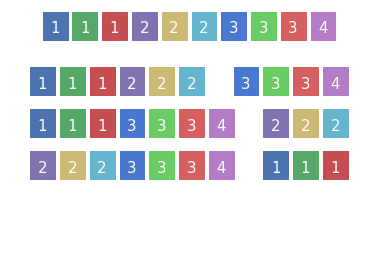

In [10]:
labels = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4]
lkf = LabelKFold(labels, n_folds=3) #check for 2 or 4

plot_kfold(lkf, labels)